In [ ]:
#Импортируем необходимые библиотеки
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import numpy as np
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
df = pd.read_csv("star_types.csv")
df

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M
...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,5,Blue,O
236,30839,834042.000000,1194.0000,-10.63,5,Blue,O
237,8829,537493.000000,1423.0000,-10.73,5,White,A
238,9235,404940.000000,1112.0000,-11.23,5,White,A


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temperature (K)         240 non-null    int64  
 1   Luminosity(L/Lo)        240 non-null    float64
 2   Radius(R/Ro)            240 non-null    float64
 3   Absolute magnitude(Mv)  240 non-null    float64
 4   Star type               240 non-null    int64  
 5   Star color              240 non-null    object 
 6   Spectral Class          240 non-null    object 
dtypes: float64(3), int64(2), object(2)
memory usage: 13.2+ KB


Нет никаких лишних данных, все оставляем

In [ ]:
df.duplicated().sum() #repeating strings

0

In [ ]:
df.describe()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type
count,240.000000,240.000000,240.000000,240.000000,240.000000
mean,10497.462500,107188.361635,237.157781,4.382396,2.500000
std,9552.425037,179432.244940,517.155763,10.532512,1.711394
min,1939.000000,0.000080,0.008400,-11.920000,0.000000
25%,3344.250000,0.000865,0.102750,-6.232500,1.000000
50%,5776.000000,0.070500,0.762500,8.313000,2.500000
75%,15055.500000,198050.000000,42.750000,13.697500,4.000000
max,40000.000000,849420.000000,1948.500000,20.060000,5.000000


<ipython-input-6-fe43fffaf13b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True)


<Axes: >

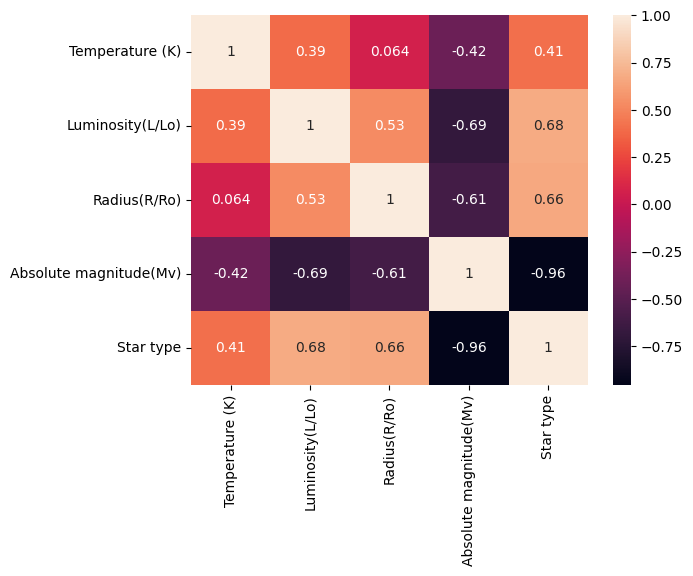

In [ ]:
sns.heatmap(df.corr(), annot = True)




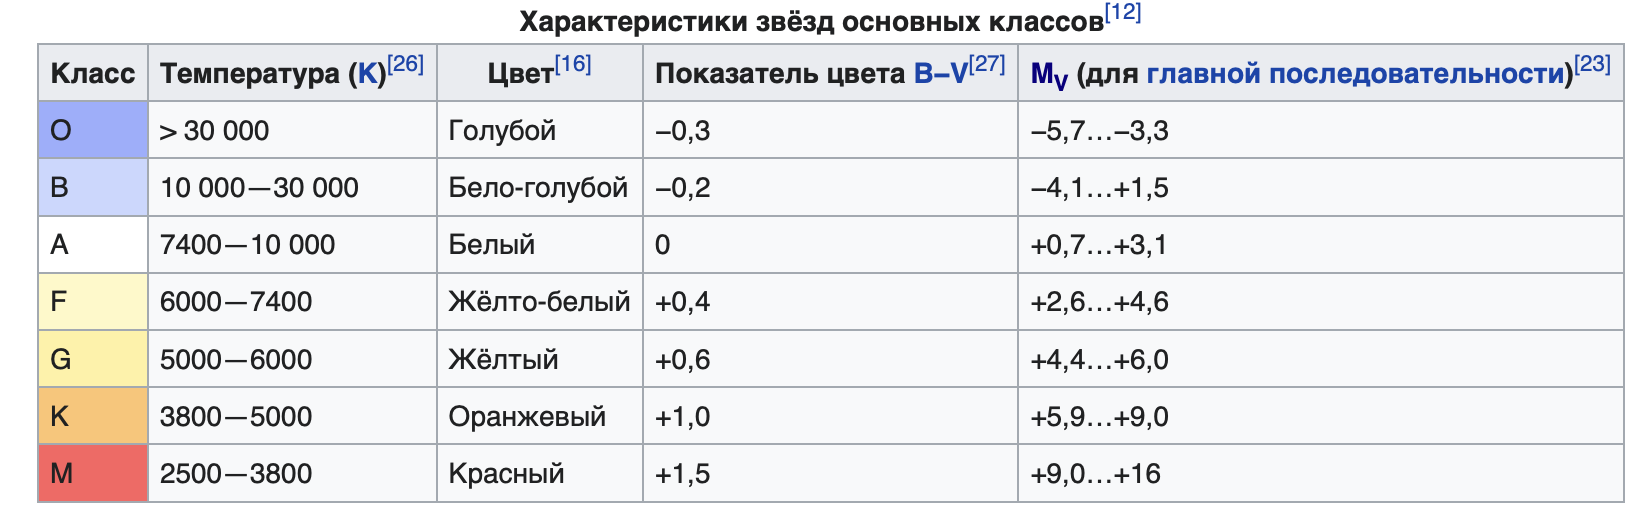

Text(0, 0.5, 'Radious')

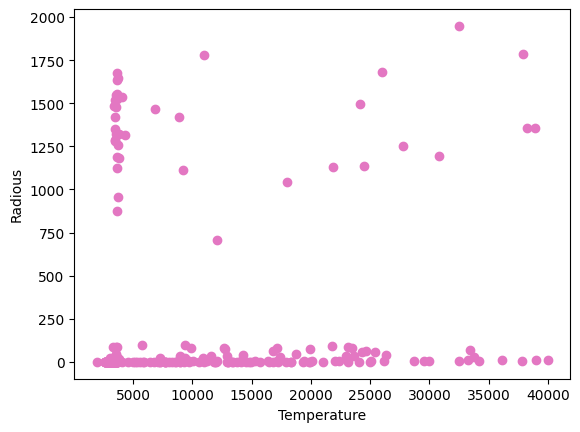

In [ ]:
temperature = df["Temperature (K)"]
radius = df["Radius(R/Ro)"]
plt.scatter(temperature, radius, c = '#e377c2')
plt.xlabel('Temperature')
plt.ylabel('Radious')

Ну, собственно никакой связи не выявлено и это логично, тк температура зависит от массы звезды и излучения ядра. Второе сразу мимо, масса звезды необязательно зависит от радиуса.

Text(0, 0.5, 'Star type')

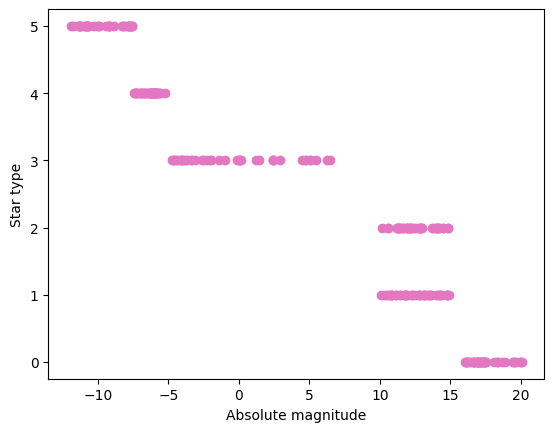

In [ ]:
star_type = df["Star type"]
magnitude = df["Absolute magnitude(Mv)"]
plt.scatter(magnitude, star_type, c = '#e377c2')
plt.xlabel('Absolute magnitude')
plt. ylabel('Star type')

На будущее построим всевозможные графики, вдруг что-то забавное будет

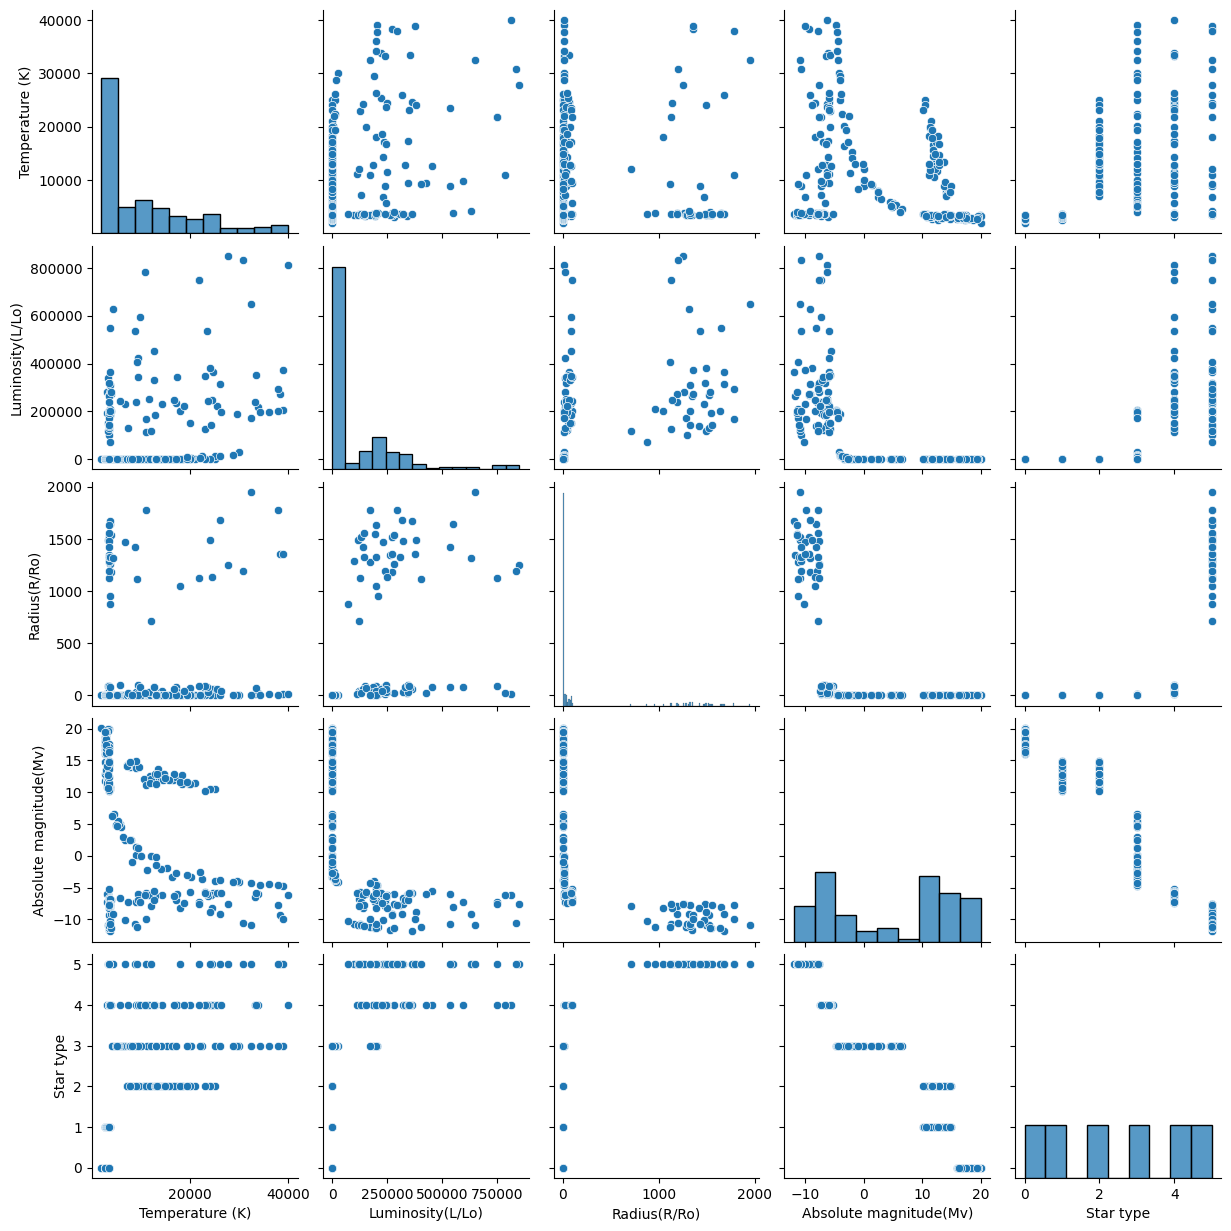

In [ ]:
sns.pairplot(df)

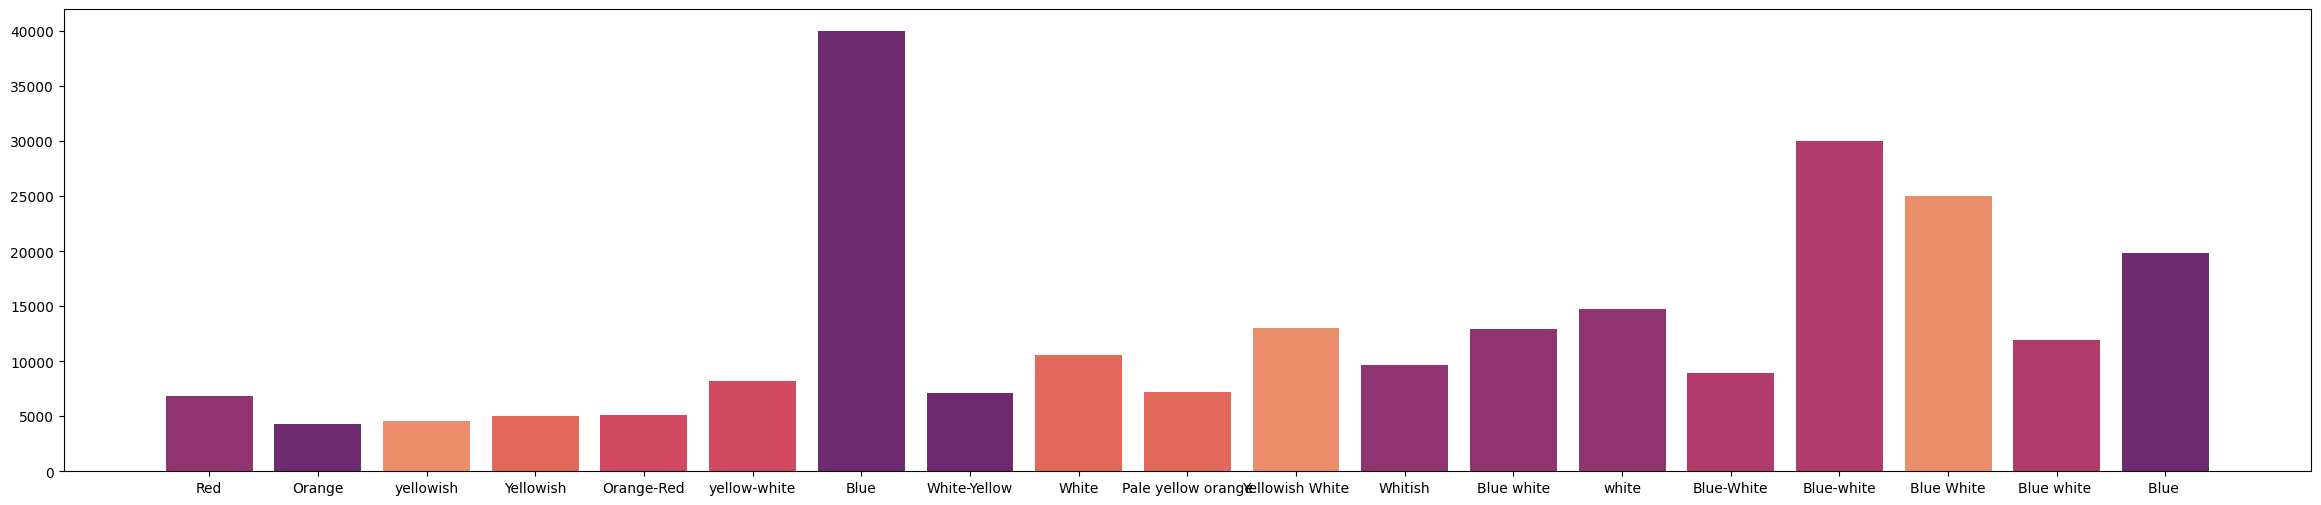

In [ ]:
df_copy = df.sort_values(by = "Temperature (K)")
plt.figure(figsize = (29, 6))
colors = sns.color_palette("flare")
temp = df_copy["Temperature (K)"]
star_color = df_copy["Star color"]
plt.bar(star_color, temp, color = colors)
plt.show()

(-1.1, 1.1, -1.1, 1.1)

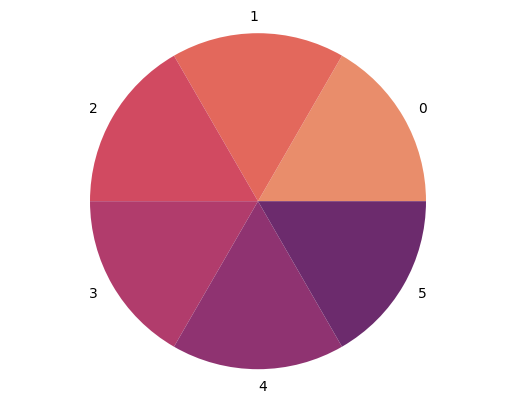

In [ ]:
qua = df["Star type"].value_counts()
types = ['0', '1', '2', '3', '4', '5']
colors = sns.color_palette("flare")
fig, ax = plt.subplots()
ax.pie(qua, labels=types, colors=colors)
ax.axis("equal")

Построим линейную регрессию для определения яркости звезды по магнитуде.


In [ ]:
x = np.array(df["Absolute magnitude(Mv)"]).reshape((-1, 1))
y = np.array(df["Luminosity(L/Lo)"])


In [ ]:
train_size = 0.7
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=train_size)

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)
r_sq = lin_reg.score(x_train, y_train)
b = lin_reg.intercept_
a = lin_reg.coef_
print(a, b)

[-11362.18195884] 155319.7141110939


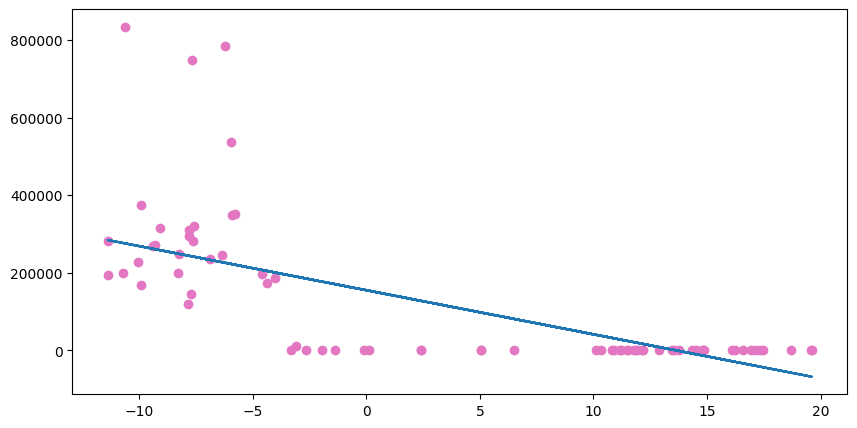

In [ ]:
y_pred = lin_reg.predict(x_test)
plt.figure(figsize = (10, 5)) #создаем график
#colors = sns.color_palette("flare") #устанавливаем палитру
plt.plot(x_test, y_pred)
plt.scatter(x_test, y_test, c='#e377c2')
plt.show()

Можем наблюдать некоторую взаимосвязь.

Согласно диаграмме Герцшпрунга — Рассела все величины тесно связанные с абсолютной звездной величиной и спектральными классами образуют зависимость, которая позволяет распределить по этой самой диаграмме разные звезды. В оригинале это выглядит так:
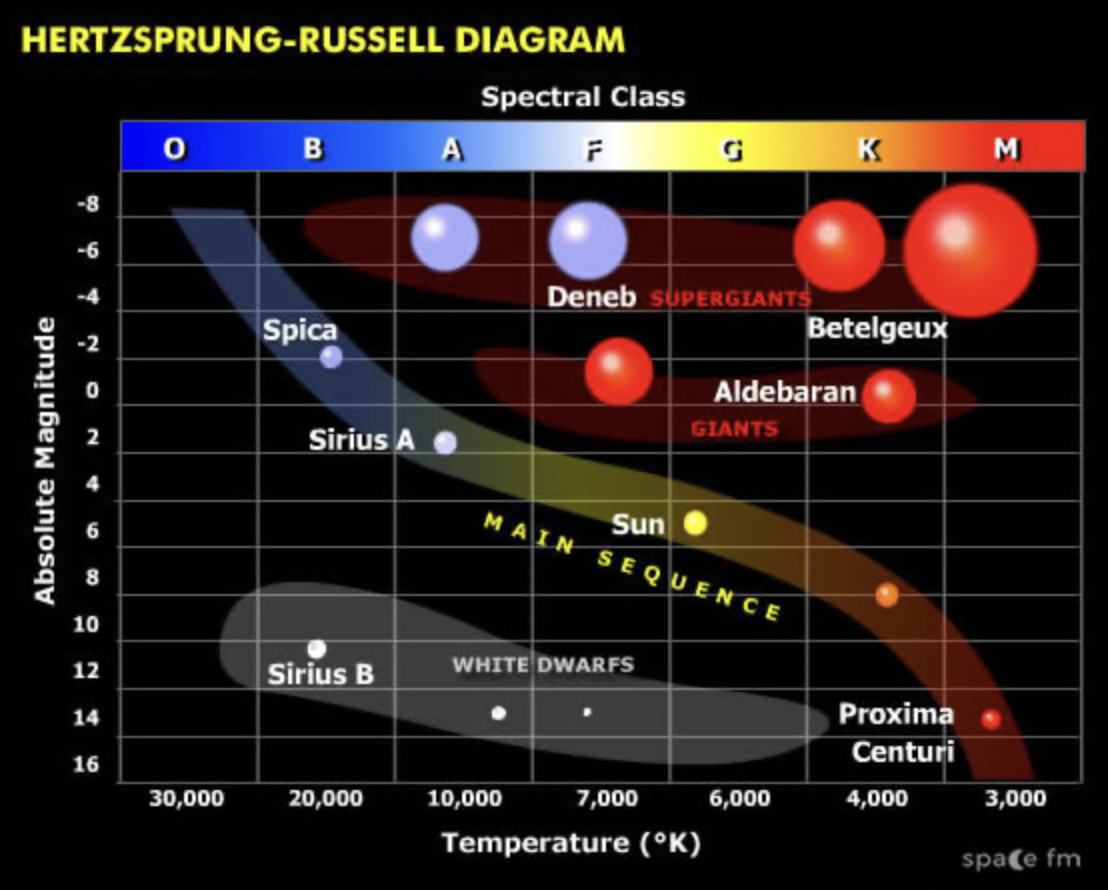

Если мы вернемся к графикам, построенным выше, то сможем увидеть нечто подобное.

Text(0, 0.5, 'Absolute magnitude')

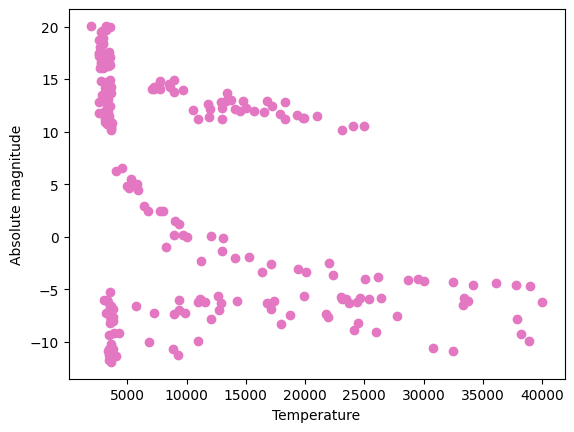

In [26]:
temperature = df["Temperature (K)"]
magnituda = df["Absolute magnitude(Mv)"]
plt.scatter(temperature, magnituda, c = '#e377c2')
plt.xlabel('Temperature')
plt.ylabel('Absolute magnitude')

Text(0, 0.5, 'Temperature')

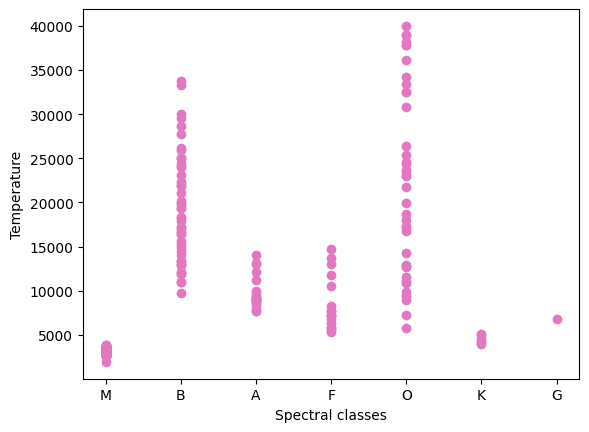

In [30]:
temperature = df["Temperature (K)"]
classes = df["Spectral Class"]
plt.scatter(classes, temperature, c = '#e377c2')
plt.xlabel('Spectral classes')
plt.ylabel('Temperature')